# Analysis of differential scanning calorimetry curves

### Abstract
This Jupyter notebook automatically analyzes a set of differential scanning calorimetry (DSC) curves. The samples were binary mixtures of two different phospholipids (DMPC and DPPC) dispersed in water. The data is from a lab in the course **KEMM77 Advanced surface and colloid chemistry** at the division of physical chemistry at Lund university. This notebook mimics part of the analysis that the students are asked to do during and after the lab. As a final figure, this notebook creates a phase diagram for the mixtures of the two phospholipids.

### Background
Phospholipids are the type of lipid molecules that make up the basis of biological membranes. They do that in the form of phospholipid bilayers (**Figure 1**). Such bilayers form spontanously when phospholipids are placed in water. The samples used to obtain the data in this notebook contained different mixtures of two phospholipids, called DMPC and DPPC (**Figure 2**). Differential scanning calorimetry (DSC) is a method that can be used for example to characterize phase transitions in a sample. In DSC the energy required to increase the temperature of the sample is compared to a reference solution such as the solvent or the buffer solution. In other words, it measures the heat capacity of the sample relative to the reference, as a function of temperature. When phase transitions occur, these show up as peaks on the obtained DSC curve.

$~$

<img src="supplementary_files/Cell_membrane_detailed_diagram_4.svg.png" width="500" align="left">

_**Figure 1.** Shematic illustration of a biological cell membrane and its components (image source: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Cell_membrane_detailed_diagram_4.svg))._

$~$

$~$

<img src="supplementary_files/DMPC_DPPC_structures.png" width="500" align="left">

_**Figure 2.** Molecular structures of the phospholipids DMPC and DPPC._

$~$

Phospholipid bilayers dispersed in water can exist in different states depending on the temperature. At low temperatures they are solid, which means that the phospholipid molecules are arranged in a crystalline manner. At higher temperatures they are fluid, which means that the phospholipid molecules have more dynamic and disordered conformations. In the fluid state the molecules can rapidly move around within the bilayer by thermal motion. DSC can be used to study the transition between these states in lipid bilayers. In the case of a bilayer made up of a single type of phospholipid molecule, the solid to fluid transition in principle occurs at a single temperature, and shows up as a sharp spike in the DSC curve. An example of this is shown for DMPC in **Figure 3**, where the transition from solid to fluid occurs at 24 $^\circ$C. As can be seen there is also a small peak at about 14 $^\circ$C, which corresponds to a transition between two different solid states with different molecular arrangements. The curve would look similar for pure DPPC, except that everything would be shifted to higher temperatures, because DPPC has higher transition temperatures due to the slightly longer hydrocarbon chains compared to DMPC (see **Figure 2**).

$~$

<img src="supplementary_files/bilayer_transitions.png" width="500" align="left">

_**Figure 3.** Example of a DSC curve for a sample with pure DMPC in water, together with schematic illustrations of the bilayer transitions._

$~$

When the bilayer is made up of a mixture of two phospholipids, the solid to fluid transition no longer occurs at a single temperature. Instead the peak on the DSC curve becomes broadened and the temperature interval of the broadened peak corresponds to a two-phase co-existance region where some areas of the bilayer are solid and the other areas are fluid. The bilayer also partially unmixes, so that the solid and fluid areas contain slightly different compositions of the phospholipids. These behaviors can be explained by thermodynamics, and can be visualized by constructing a phase diagram. In this notebook we will use the DSC data for the different mixtures of DMPC and DPPC to construct a phase diagram that shows the solid to fluid transitions.

For more background information, please see the lab instructions from the **KEMM77** course ([DSC_lab_instructions_2019.pdf](supplementary_files/DSC_lab_instructions_2019.pdf)).

### Let's begin

In [1]:
# Import the necessary libraries
import numpy as np # For numerical mathematics
import pandas as pd # For data organization
import matplotlib.pyplot as plt # For making figures
%matplotlib inline

In [2]:
## Load raw data from text files into a Pandas DataFrame
XDPPC00 = pd.DataFrame(np.genfromtxt('DSC_data/XDPPC00Sdsc.TXT', delimiter='\t', skip_header=1)[:,0:2])
XDPPC03 = pd.DataFrame(np.genfromtxt('DSC_data/XDPPC03Sdsc.TXT', delimiter='\t', skip_header=1)[:,0:2])
XDPPC05 = pd.DataFrame(np.genfromtxt('DSC_data/XDPPC05Sdsc.TXT', delimiter='\t', skip_header=1)[:,0:2])
XDPPC07 = pd.DataFrame(np.genfromtxt('DSC_data/XDPPC07Sdsc.TXT', delimiter='\t', skip_header=1)[:,0:2])
XDPPC08 = pd.DataFrame(np.genfromtxt('DSC_data/XDPPC08Sdsc.TXT', delimiter='\t', skip_header=1)[:,0:2])
XDPPC10 = pd.DataFrame(np.genfromtxt('DSC_data/XDPPC10Sdsc.TXT', delimiter='\t', skip_header=1)[:,0:2])
data = pd.concat([XDPPC00, XDPPC03, XDPPC05, XDPPC07, XDPPC08, XDPPC10], axis=1)

sample_labels = ['0', '0.3', '0.5', '0.7', '0.8', '1']
data.columns = pd.MultiIndex.from_product([sample_labels, ['temp', 'cp']])
##

data[[(a, 'cp') for a in sample_labels]] = data[[(a, 'cp') for a in sample_labels]] * 4.184 # Convert from cal/C to J/C

data # Visualize the DataFrame

0                 0.3                 0.5                 0.7  \
          temp        cp      temp        cp      temp        cp      temp   
0      5.68407 -0.002474   5.67643 -0.002708   5.68464 -0.002722   5.67256   
1      5.70353 -0.002473   5.69333 -0.002704   5.70198 -0.002727   5.68788   
2      5.71923 -0.002470   5.71265 -0.002702   5.71765 -0.002727   5.70643   
3      5.73540 -0.002472   5.72845 -0.002695   5.73506 -0.002728   5.72249   
4      5.75240 -0.002474   5.74504 -0.002700   5.75217 -0.002728   5.73844   
...        ...       ...       ...       ...       ...       ...       ...   
3268  59.96467 -0.002074  59.95622 -0.002199  59.96014 -0.002194  59.94771   
3269  59.98123 -0.002076  59.97266 -0.002199  59.97741 -0.002190  59.96368   
3270  59.99841 -0.002074  59.98831 -0.002198       NaN       NaN  59.97859   
3271       NaN       NaN       NaN       NaN       NaN       NaN  59.99423   
3272       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                     0.8                   1            
            cp      temp        cp      temp        cp  
0    -0.002545   5.67900 -0.002437   5.68166  0.001872  
1    -0.002545   5.69546 -0.002438   5.69785  0.001870  
2    -0.002541   5.71279 -0.002431   5.71339  0.001871  
3    -0.002537   5.72996 -0.002428   5.73167  0.001870  
4    -0.002535   5.74436 -0.002429   5.75002  0.001863  
...        ...       ...       ...       ...       ...  
3268 -0.002021  59.95664 -0.002001  59.92730  0.000066  
3269 -0.002027  59.97231 -0.002004  59.94052  0.000069  
3270 -0.002027  59.99118 -0.002000  59.95804  0.000074  
3271 -0.002027       NaN       NaN  59.97718  0.000067  
3272       NaN       NaN       NaN  59.99222  0.000063  

[3273 rows x 12 columns]

In the DataFrame shown above **temp** is the temperature (in $^{\circ}$C) and **cp** is the excess heat capacity of each sample relative to a reference with pure water (in J/$^{\circ}$C). The labels above denote the molar fraction of DPPC in the bilayer in each sample (**0** corresponds to pure DMPC and **1** corresponds to pure DPPC).

In [3]:
def figure_generator(data, file_name): # Function used to make figures with the DSC curves
    
    fig = plt.figure(figsize=[89/25.4, 160/25.4], dpi=300)
    ax1 = fig.add_axes([0, 0.52, 1, 0.48])
    ax2 = fig.add_axes([0, 0, 1, 0.48])
    
    for i in range(0, len(sample_labels)):
        ax1.plot(data[sample_labels[i]]['temp'], 1000*data[sample_labels[i]]['cp'], color=[i/(len(sample_labels)-1), 0, 1-i/(len(sample_labels)-1)])
    ax1.set_xlim([2, 63])
    ax1.set_xticks(np.linspace(10, 60, 6))
    ax1.set_ylim([-10, 230])
    ax1.set_yticks(np.linspace(0, 200, 5))
    ax1.set_xticklabels('')

    for i in range(0, len(sample_labels)):
        ax2.plot(data[sample_labels[i]]['temp'], 1000*data[sample_labels[i]]['cp'], color=[i/(len(sample_labels)-1), 0, 1-i/(len(sample_labels)-1)])
    ax2.set_xlim([2, 63])
    ax2.set_xticks(np.linspace(10, 60, 6))
    ax2.set_ylim([-3.5, 18])
    ax2.set_yticks(np.linspace(0, 15, 4))
    
    ax1.legend(sample_labels, title='$X_{DPPC} = $', frameon=False, loc='upper center', ncol=1, bbox_to_anchor=(1.15, 1))._legend_box.align = "left"
    ax2.set_xlabel('Temperature [$^{\circ}C$]')
    ax2.xaxis.set_label_coords(0.5, -0.15)
    ax2.set_ylabel('Excess heat capacity [mJ/$^{\circ}C$]')
    ax2.yaxis.set_label_coords(-0.15, 1.04)

    fig.savefig(file_name + '.png', dpi='figure', bbox_inches='tight') # Save figure
    data.to_csv(file_name + '.txt', sep=';') # Save data used for figure
    
    return [fig, ax1, ax2]

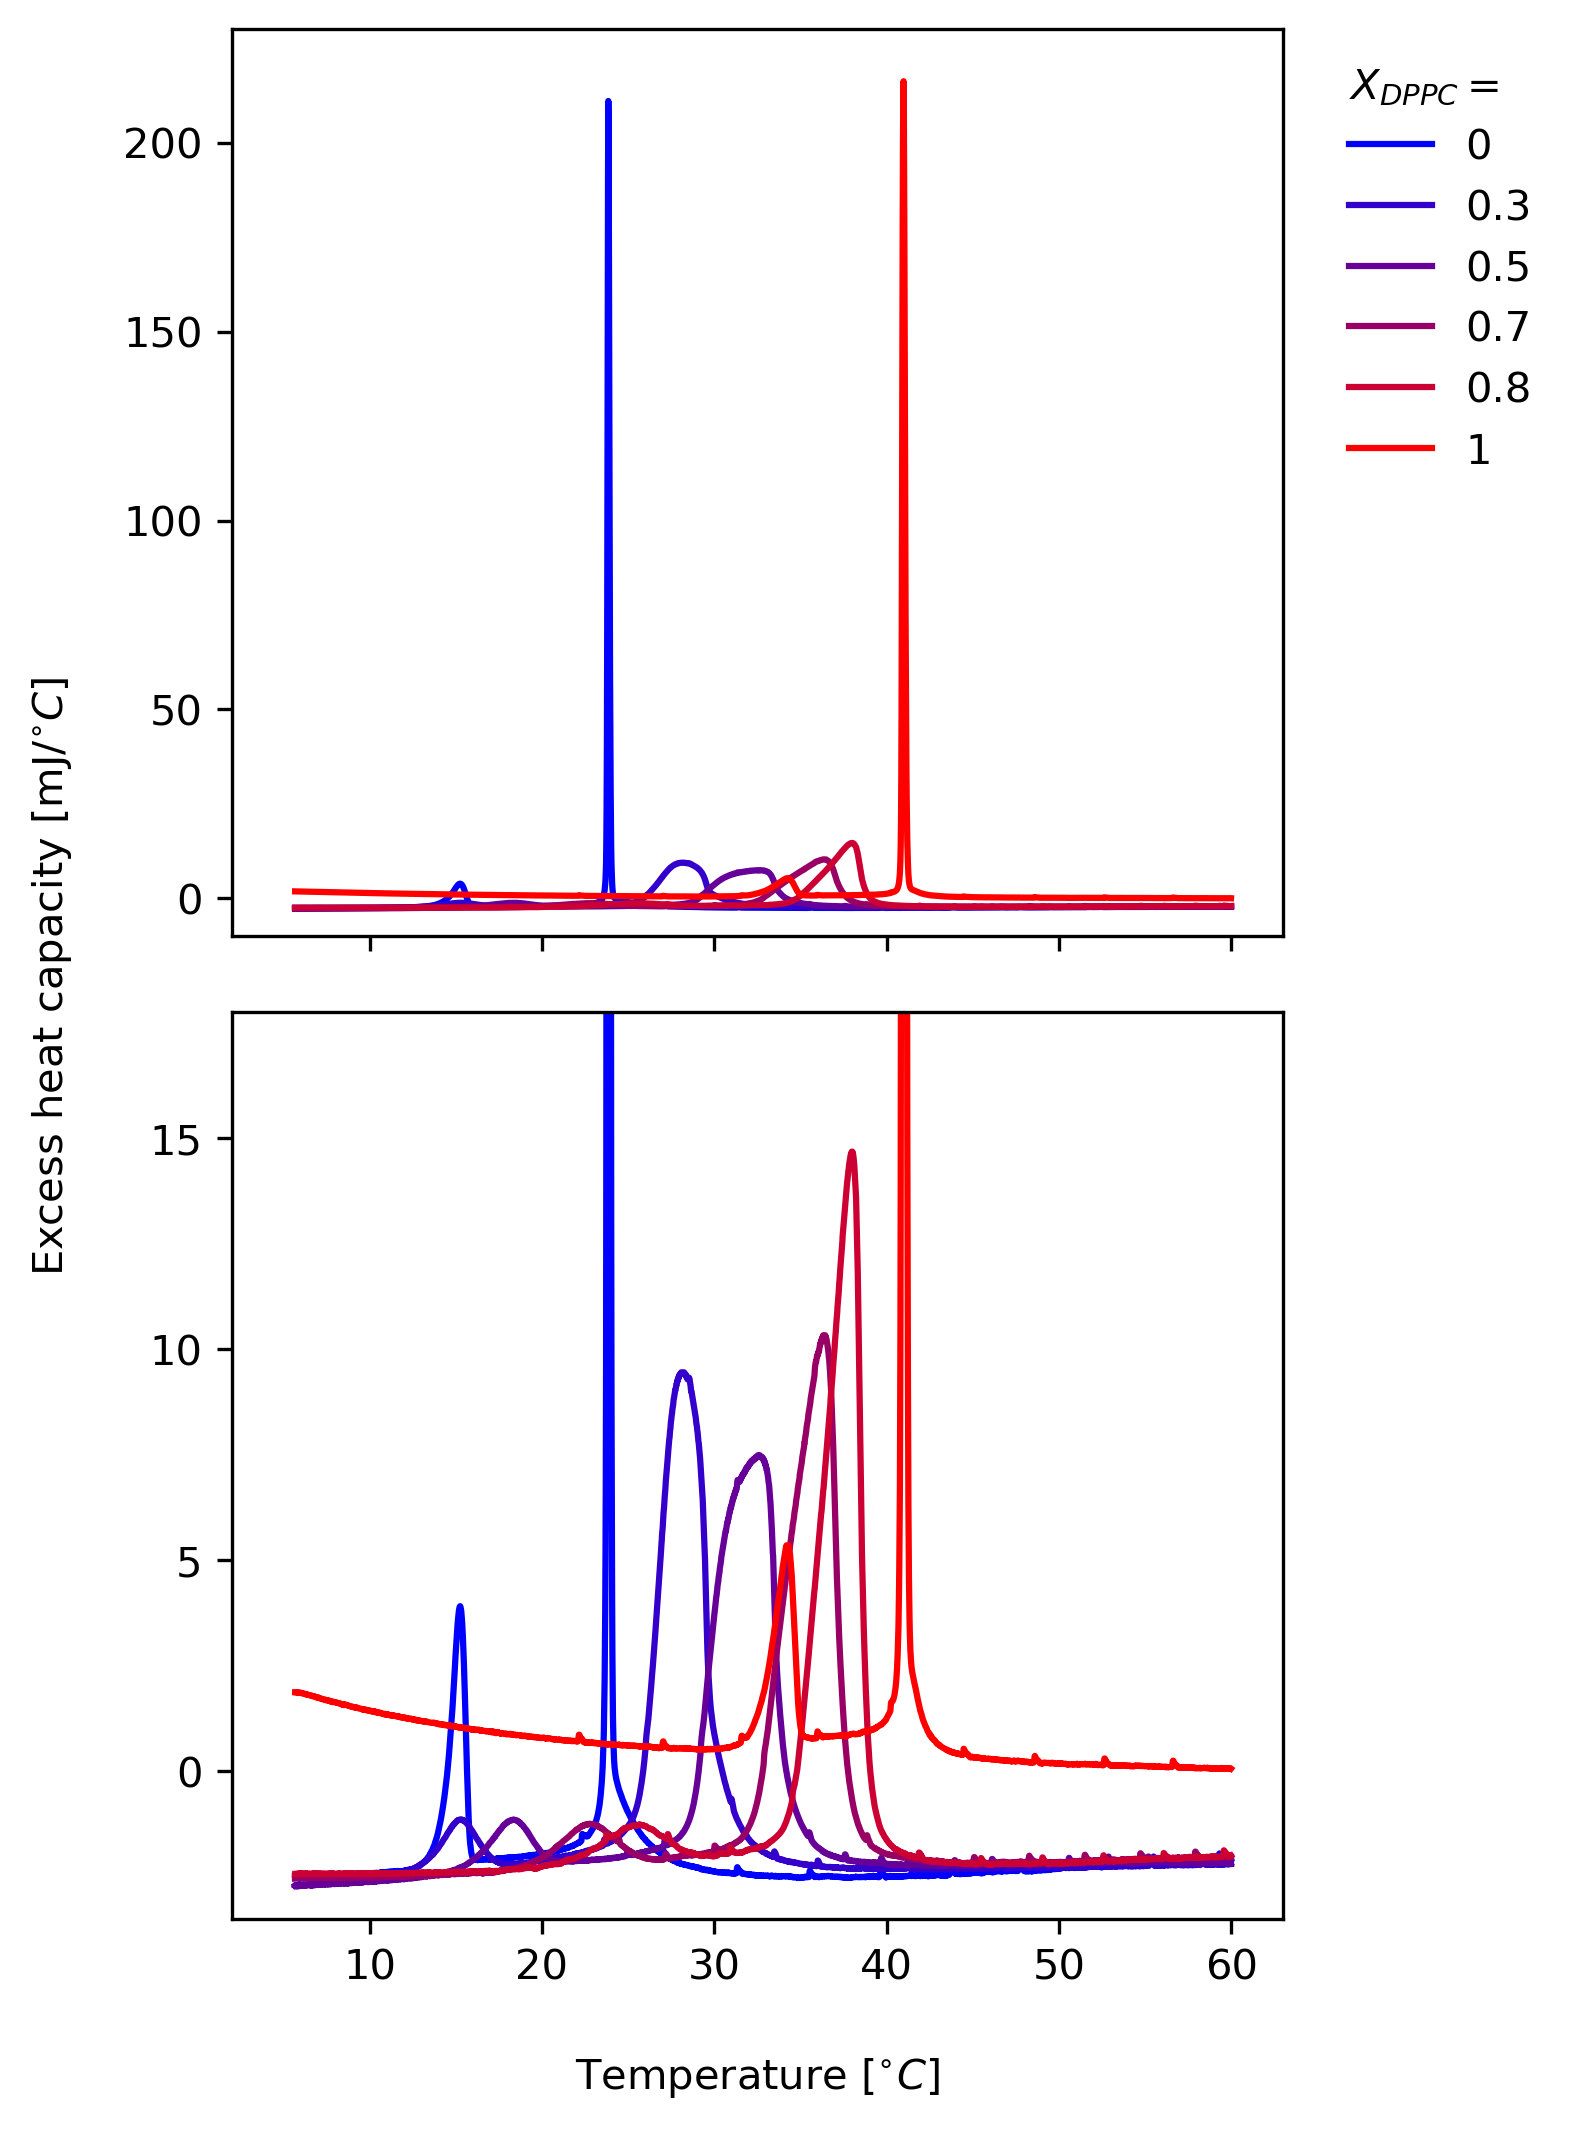

In [4]:
figure_generator(data, 'output_figures/unprocessed_DSC_curves'); # Make a figure with the unprocessed DSC curves

In the DSC curves shown above we are only interested in the peaks, because the peaks show the phase transitions of the samples. However, as can be seen in the figure the baselines of the curves are not flat, and they are also shifted away from zero (this can for example happen if the volume of the sample is not exactly the same as the volume of the reference solution in the DSC machine). The uneven baselines will make the analysis of the peaks more complicated, so in the next step we create an algorithm that automatically detects the baselines of the curves. After that we will subtract the detected baselines.

In [5]:
# This code analyzes the unprocessed DSC curves and automatically detects the baselines

baselines = data.copy()

for i in range(0, len(sample_labels)): # Run through each sample
    
    print('Analyzing curve ' + str(i+1) + ' of ' + str(len(sample_labels)) + ',')
    
    temp = data[sample_labels[i]]['temp'].values
    temp = temp[~np.isnan(temp)]
    cp = data[sample_labels[i]]['cp'].values
    cp = cp[~np.isnan(cp)]

    # Remove overall linear tilt of the curve
    line_1 = cp[0] + (cp[-1]-cp[0])/(temp[-1]-temp[0])*(temp-temp[0])
    cp = cp-line_1

    # Use only the data points closest to the median y-value along the curve
    cp[cp<np.percentile(cp, 25)] = np.percentile(cp, 25)
    cp[cp>np.percentile(cp, 75)] = np.percentile(cp, 75)

    # Again remove overall linear tilt of the curve. This prevents discontinuity effects at the edges of the data.
    line_2 = cp[0] + (cp[-1]-cp[0])/(temp[-1]-temp[0])*(temp-temp[0])
    cp = cp-line_2

    # Enter frequency space
    fourier = []
    f_space = np.linspace(-5, 5, 1001)
    for f in f_space:
        fourier.append(np.trapz(cp*np.exp(-2*np.pi*1j*f*temp), temp))

    # Use only the low frequency signal of the data by applying a gaussian filter
    gauss = np.exp(-50*f_space**2)
    fourier = fourier*gauss

    # Go back into real space
    ifourier = []
    for t in temp:
        ifourier.append(np.trapz(fourier*np.exp(2*np.pi*1j*t*f_space), f_space))
        
    # create the baselines based on the previous steps and save them in the variable 'baselines'
    baselines.loc[:, (sample_labels[i], 'cp')] = pd.Series(np.append(np.array(ifourier).real+line_1+line_2, data[sample_labels[i]]['cp'].values[np.isnan(data[sample_labels[i]]['cp'].values)]))

print('Done.')

Analyzing curve 1 of 6,
Analyzing curve 2 of 6,
Analyzing curve 3 of 6,
Analyzing curve 4 of 6,
Analyzing curve 5 of 6,
Analyzing curve 6 of 6,
Done.


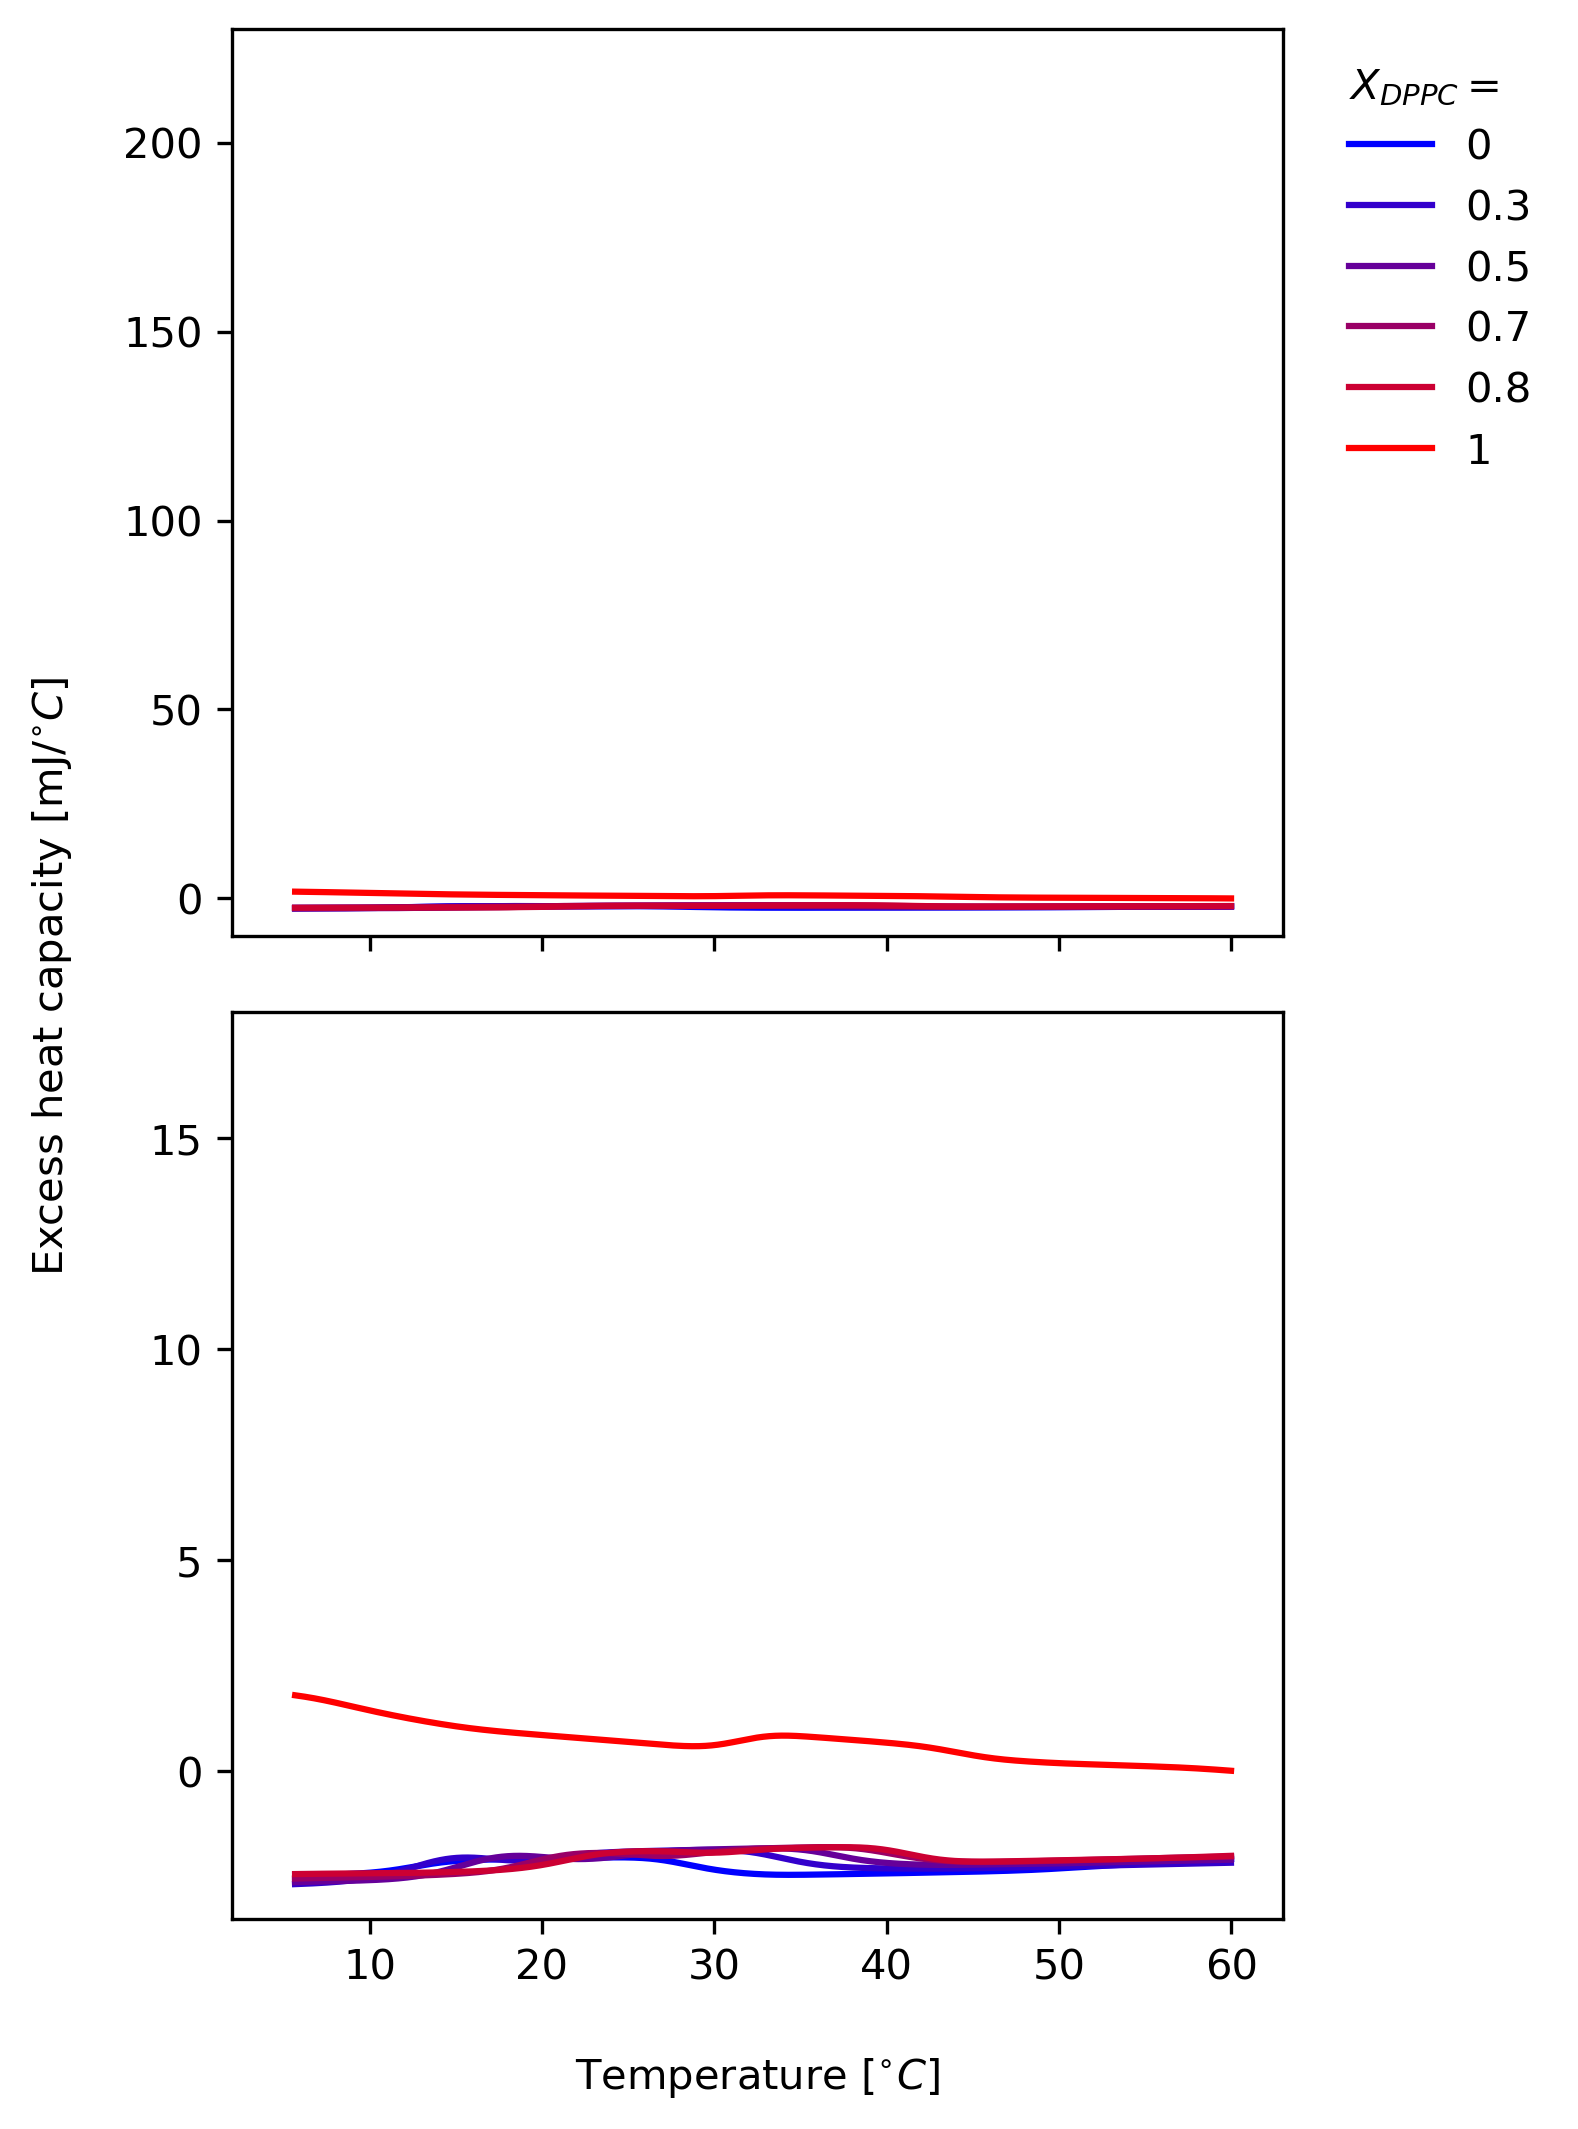

In [6]:
figure_generator(baselines, 'output_figures/detected_baselines'); # Make a figure that shows the detected baselines

Now when the baselines have been detected, we can subrtact them from the unprocessed DSC curves.

In [7]:
# Sutract the baselines from the unprocessed DSC curves
data_corr = data.copy()
data_corr[[(a, 'cp') for a in sample_labels]] = data[[(a, 'cp') for a in sample_labels]] - baselines[[(a, 'cp') for a in sample_labels]]

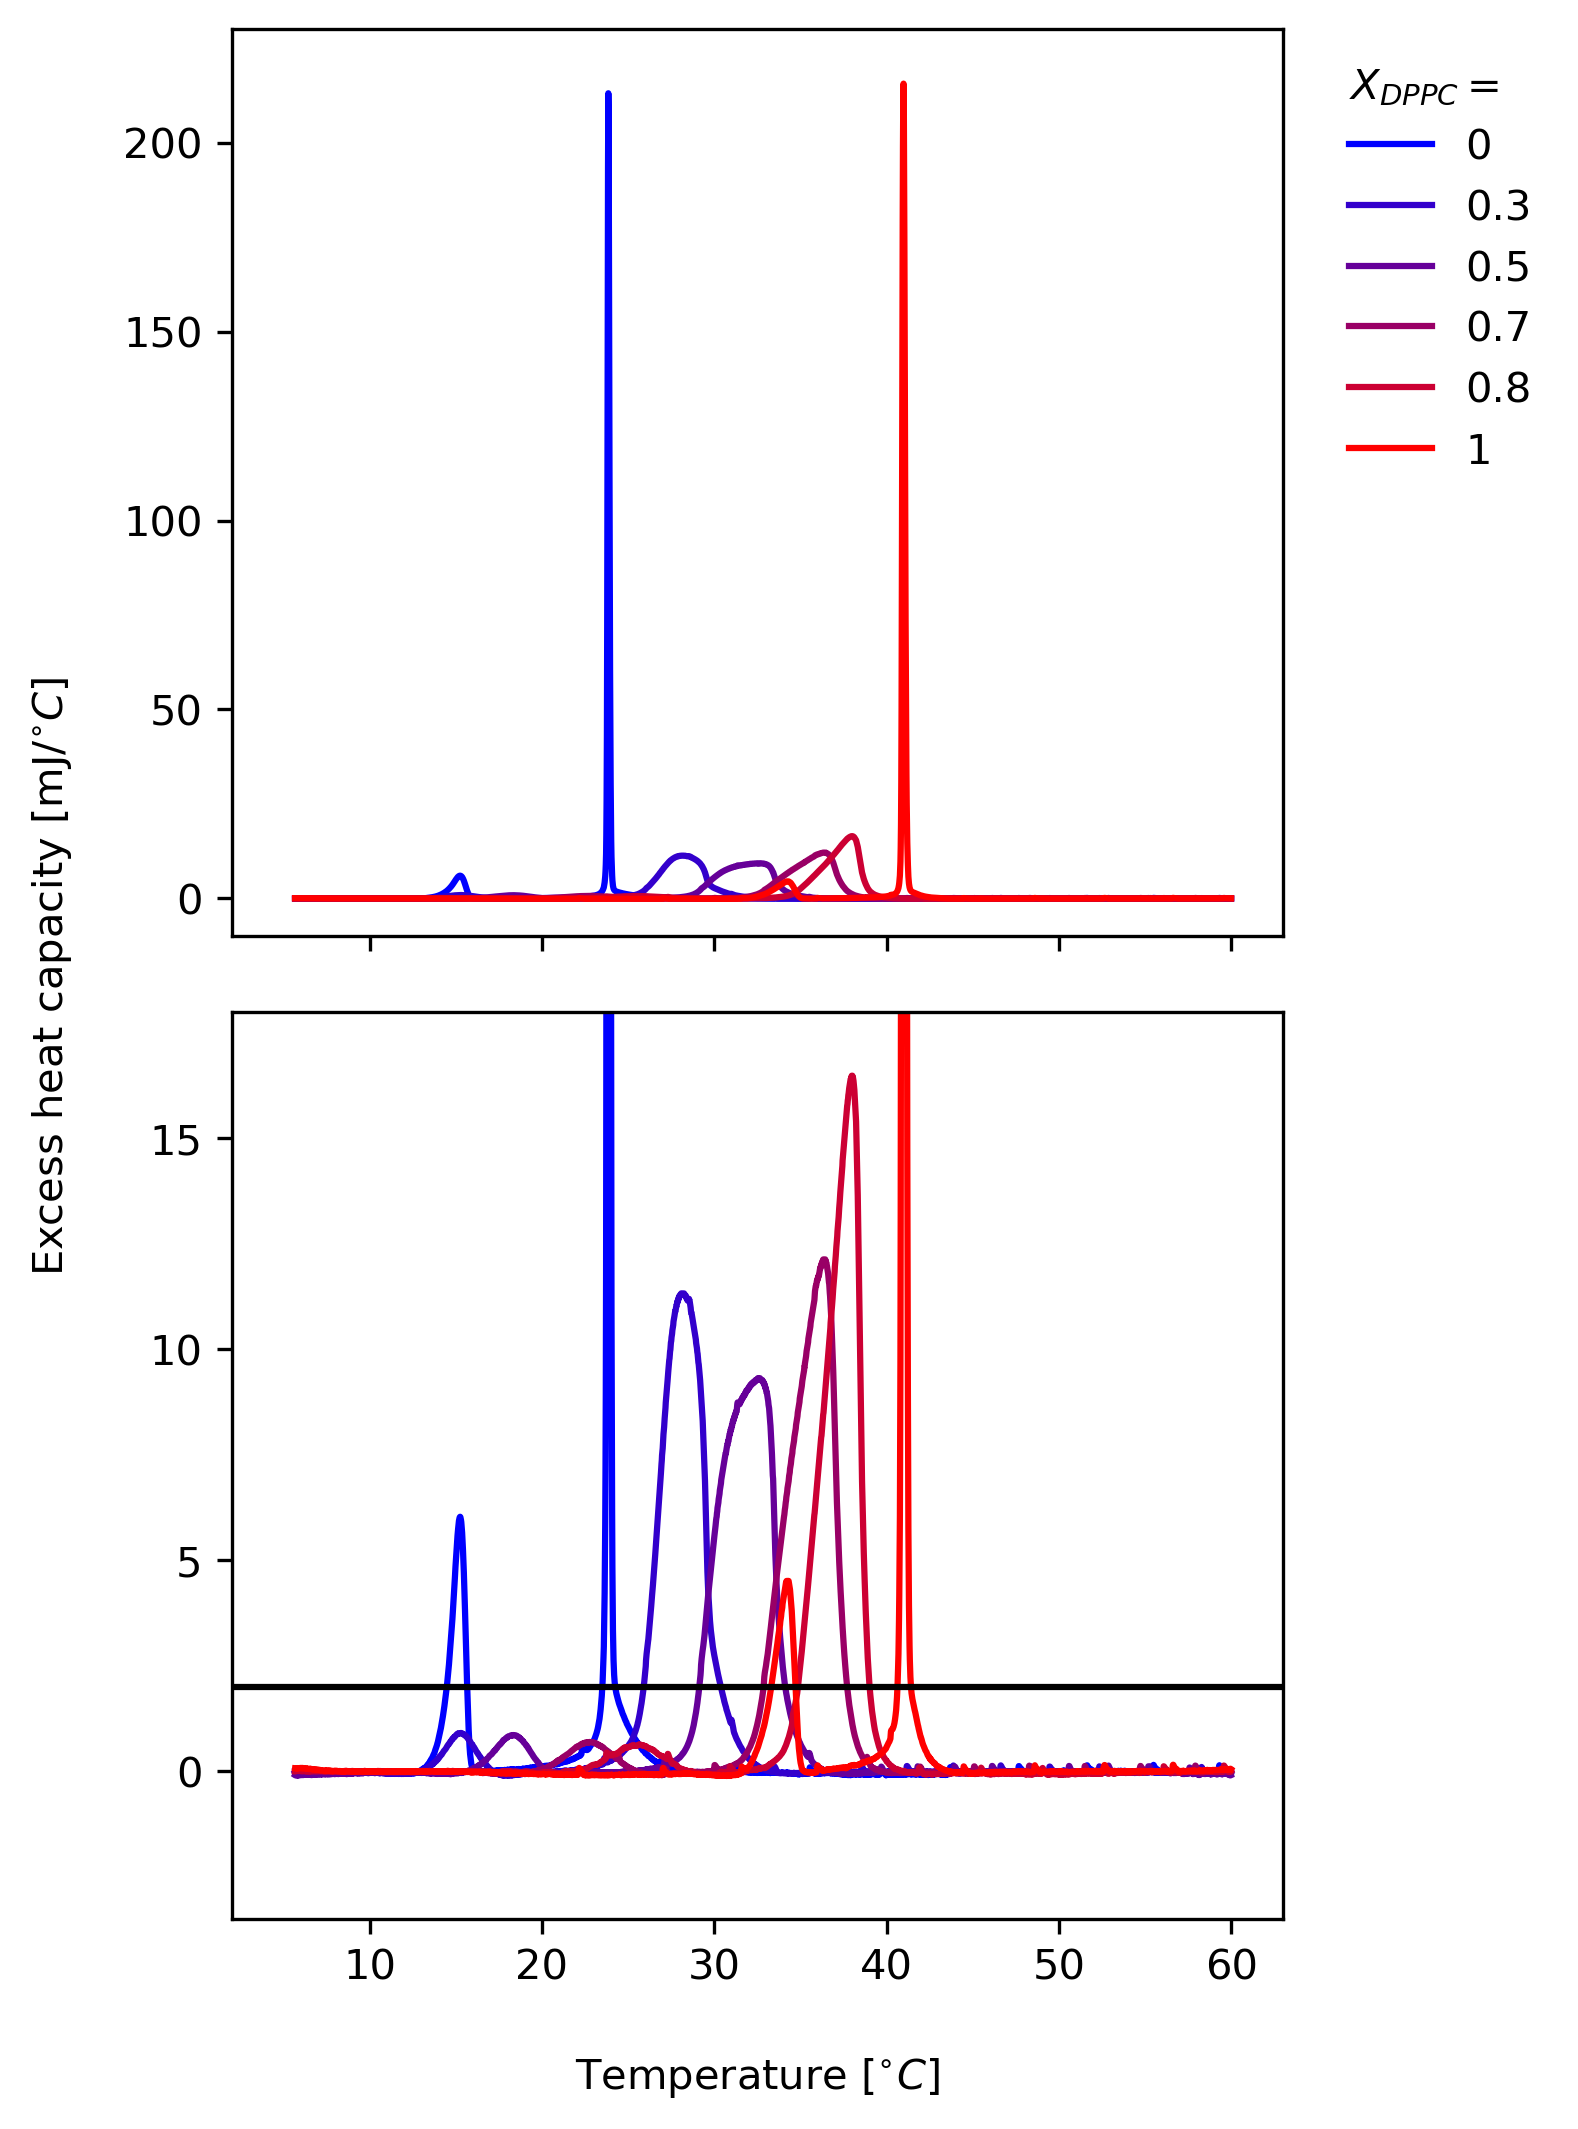

In [8]:
[fig, ax1, ax2] = figure_generator(data_corr, 'output_figures/baseline_subtracted_DSC_curves') # Make a figure with the baseline subtracted DSC curves

readoff_value = 0.002 # Define a readoff value that will be used in the creation of the phase diagram

# Show where the readoff value is on the DSC curves in the figure
readoff_line = {'x': [-10, 80], 'y': [1000*readoff_value, 1000*readoff_value]}
ax2.plot(readoff_line['x'], readoff_line['y'], color=[0, 0, 0]);

The figure above shows the DSC curves with the original baselines subtracted. As can be seen we have now more clearly isolated the peaks. To make the phase diagram, we want to know the boundaries of the main transition peaks (the ones corresponding to the solid to fluid transitions). For the pure phospholipid samples, we know that the transition peaks should in principle be like infinite spikes (delta functions), but we can see that they are a bit broad at the base. To make an rough correction for this we read off the boundaries of the peaks at a certain offset from zero along the y-axis (at 2 mJ/$^{\circ}$C). This will probably give more correct values also for the other samples with the broader peaks.

In the next step we detect these boundaries of the peaks and use them to create the phase diagram for the solid to fluid transition. In the phase diagram we also include theoretical phase boundaries based on assuming that the two different phospholipids (DMPC and DPPC) are mixing ideally with each other within each phase. This is done with the equations below (Mabrey & Sturtevant, 1976).

$ \\~\\ X^{upper}_{DPPC} = \frac{1-\alpha}{\beta-\alpha}~, \hspace{10mm}
X^{lower}_{DPPC} = \beta\cdot X^{upper}_{DPPC}~, \hspace{10mm}
\alpha = e^{\frac{\Delta H_{DMPC}}{R}\cdot\left(\frac{1}{T}-\frac{1}{T_{DMPC}}\right)}~, \hspace{10mm}
\beta = e^{\frac{\Delta H_{DPPC}}{R}\cdot\left(\frac{1}{T}-\frac{1}{T_{DPPC}}\right)}~. \\~\\ $

In these equations $X^{upper}_{DPPC}$ and $X^{lower}_{DPPC}$ are the molar fractions of DPPC that correspond to the upper and lower boundaries of the solid and fluid co-existance region. $T_{DMPC}$, $T_{DPPC}$, $\Delta H_{DMPC}$, and $\Delta H_{DPPC}$ are the solid to fluid transition temperatures and molar transition enthalpies for pure DMPC and DPPC bilayers, $R$ is the gas constant, and $T$ is the absolute temperature.

In [9]:
# Detect where the readoff value intersects with the main transition peaks of the DSC curves (the phase edges)

phase_edges = np.zeros([len(sample_labels), 2]) # This variable will be laoded with the detected phase edges

for i in range(0, len(sample_labels)): # Run through each sample
    
    temp = data_corr[sample_labels[i]]['temp'].values
    temp = temp[~np.isnan(temp)]
    
    cp = data_corr[sample_labels[i]]['cp'].values
    cp = cp[~np.isnan(cp)]
    
    edges_detected = 0
    for j in range(len(temp)-1, 0-1, -1):
        if cp[j] > readoff_value and edges_detected == 0:
            phase_edges[i, 1] = temp[j]
            edges_detected += 1
        elif cp[j] < readoff_value and edges_detected == 1:
            phase_edges[i, 0] = temp[j]
            edges_detected += 1
        elif edges_detected == 2:
            break

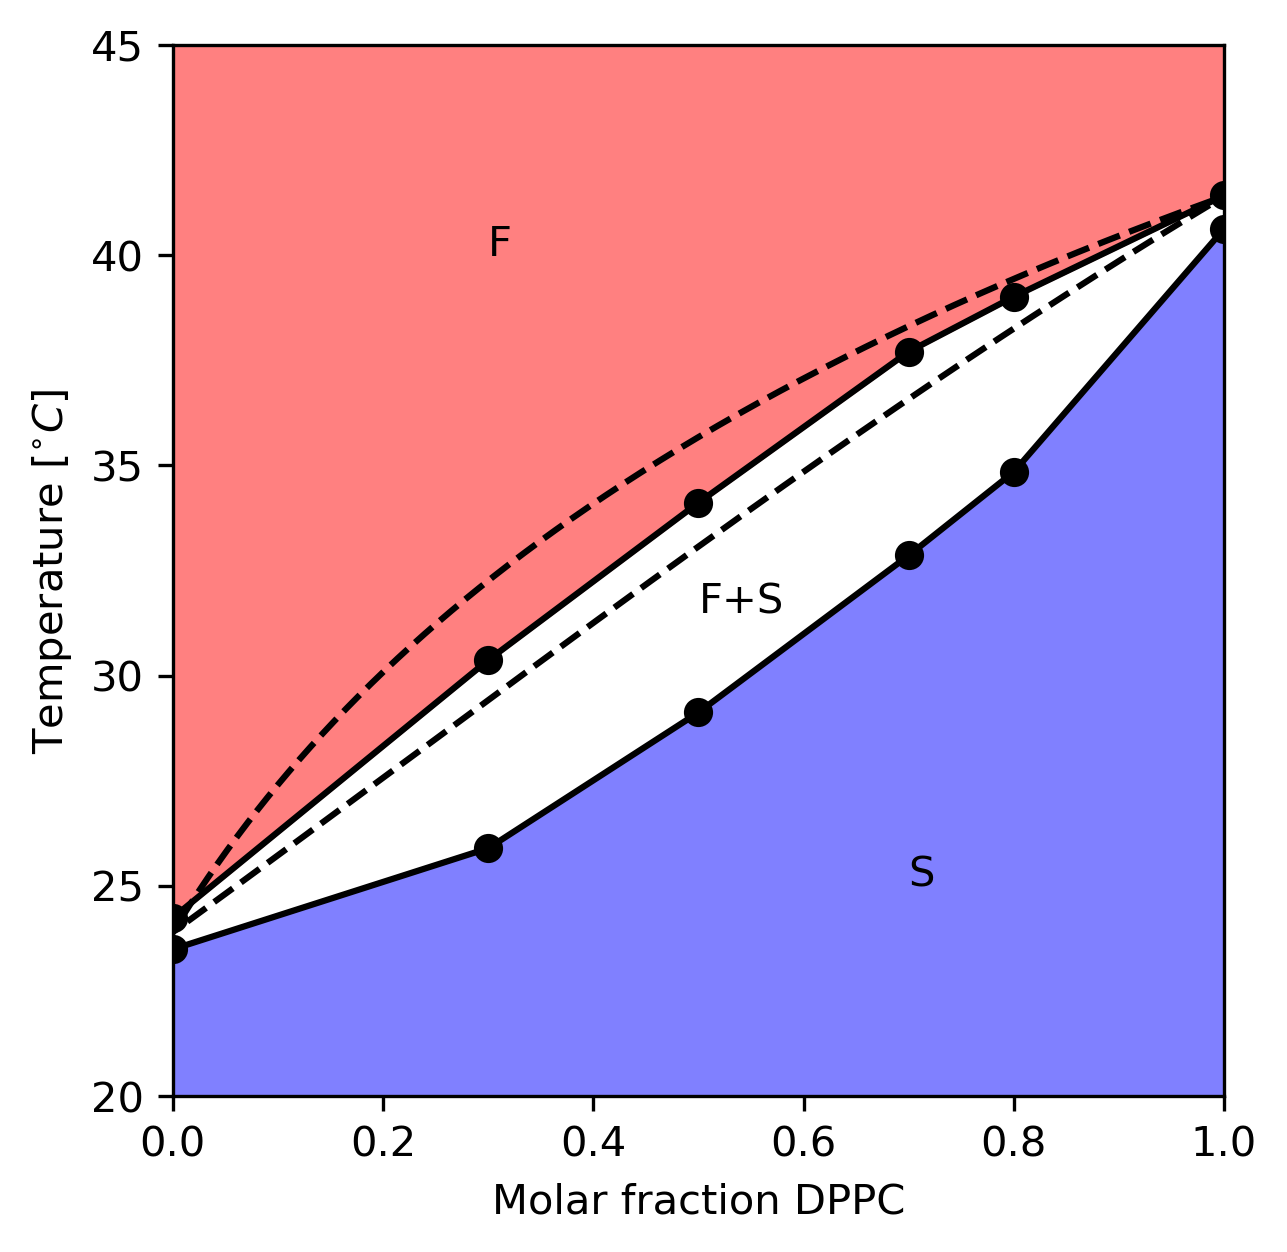

In [10]:
## Make the experimental phase diagram
molar_fracs = []
for s in sample_labels:
    molar_fracs.append(float(s))

fig = plt.figure(figsize=[89/25.4, 89/25.4], dpi=300)
ax = fig.add_axes([0, 0, 1, 1])

ax.fill_between(molar_fracs, phase_edges[:, 0], 0*phase_edges[:, 0]+10, color=[0.5, 0.5, 1])
ax.fill_between(molar_fracs, phase_edges[:, 1], 0*phase_edges[:, 1]+50, color=[1, 0.5, 0.5])
ax.plot(molar_fracs, phase_edges[:, 0], color=[0, 0, 0])
ax.scatter(molar_fracs, phase_edges[:, 0], color=[0, 0, 0])
ax.plot(molar_fracs, phase_edges[:, 1], color=[0, 0, 0])
ax.scatter(molar_fracs, phase_edges[:, 1], color=[0, 0, 0])

ax.set_xlabel('Molar fraction DPPC')
ax.set_ylabel('Temperature [$^{\circ}C$]')
ax.set_xlim([0, 1])
ax.set_ylim([20, 45]);

ax.text(0.3, 40, 'F') # Fluid phase
ax.text(0.5, 31.5, 'F+S') # Fluid + Solid two-phase region
ax.text(0.7, 25, 'S') # Solid phase
##

## Calculate the theoretical phase diagram, based on ideal mixing of the phospholipids in each phase, and add to the figure
DH_DMPC = 22593.6 # J/mol
DH_DPPC = 36400.8 # J/mol
R = 8.314 # J/(K*mol)
T_DMPC = 297.05 # K
T_DPPC = 314.55 # K

T = np.linspace(20, 45, 1000) + 273.15 # K

alpha = np.exp(DH_DMPC/R*(1/T-1/T_DMPC))
beta = np.exp(DH_DPPC/R*(1/T-1/T_DPPC))

X_DPPC_upper = (1-alpha)/(beta-alpha)
X_DPPC_lower = beta*X_DPPC_upper

ax.plot(X_DPPC_upper, T-273.15, color=[0, 0, 0], linestyle='--')
ax.plot(X_DPPC_lower, T-273.15, color=[0, 0, 0], linestyle='--')
##

fig.savefig('output_figures/phase_diagram.png', dpi='figure', bbox_inches='tight') # save figure

figure_data = pd.concat([pd.DataFrame(np.array([np.array(molar_fracs), phase_edges[:,0], phase_edges[:,1]]).T), pd.DataFrame(np.array([T-273.15, X_DPPC_lower, X_DPPC_upper]).T)], axis=1)
figure_data.columns = [['Experimental', 'Experimental', 'Experimental', 'Theoretical', 'Theoretical', 'Theoretical'], ['X_DPPC', 'T_solid [C]', 'T_fluid [C]', 'T [C]', 'X_DPPC_lower', 'X_DPPC_upper']]
figure_data.to_csv('output_figures/phase_diagram.txt', sep=';') # Save data used for figure

We can see that the agreement is very high between the phase diagram we have constructed above and the one in figure 2 in the paper by Mabrey and Sturtevant (Mabrey & Sturtevant, 1976)!

### References

Mabrey S, Sturtevant JM. (1976). Investigation of phase transitions of lipids and lipid mixtures by high sensitivity differential scanning calorimetry. Proc Natl Acad Sci USA, 73:3862-3866.